In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [32]:
df = pd.read_csv('data.csv', delimiter='\t')

In [33]:
df

,time,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14
0,25.57,27.94,28.31,28.00,28.37,28.37,28.37,28.31,28.69,27.75,27.25,27.69,27.81,28.31,27.50
1,28.24,27.94,28.31,28.00,28.31,28.37,28.37,28.31,28.69,27.75,27.25,27.69,27.81,28.31,27.50
2,28.90,27.94,28.31,28.00,28.31,28.44,28.31,28.31,28.62,27.69,27.25,27.75,27.81,28.31,27.50
3,29.56,27.94,28.31,27.94,28.37,28.44,28.37,28.31,28.62,27.75,27.25,27.75,27.81,28.31,27.50
4,30.23,27.94,28.31,27.94,28.37,28.44,28.37,28.31,28.62,27.75,27.25,27.69,27.87,28.31,27.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1798.48,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.31,28.62,27.75
2670,1799.20,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.25,28.62,27.75
2671,1799.86,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.25,28.69,27.81
2672,1800.42,36.13,35.31,33.56,32.69,31.62,30.94,30.19,30.19,29.00,28.06,28.31,28.31,28.62,27.81


In [34]:
df.columns

Index(['time', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temp_6',
       'temp_7', 'temp_8', 'temp_9', 'temp_10', 'temp_11', 'temp_12',
       'temp_13', 'temp_14'],
      dtype='object')

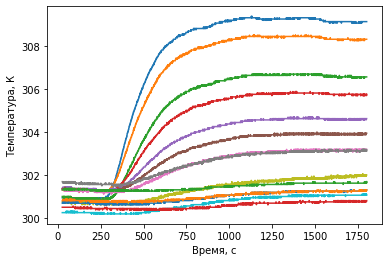

In [55]:
plt.plot(df.set_index('time') + 273)
plt.ylabel("Температура, К")
plt.xlabel("Время, с")
plt.savefig('Lab2_1.eps', format='eps')

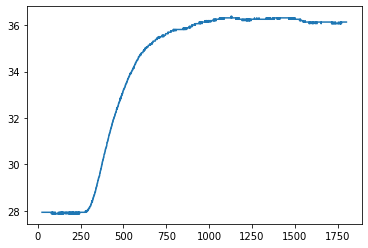

In [36]:
plt.plot(df.time.values, df.temp_1.values)

In [37]:
df[1700:1800]

,time,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14
1700,1155.42,36.31,35.44,33.69,32.75,31.56,30.87,30.00,29.94,28.69,27.94,28.19,28.12,28.56,27.69
1701,1156.14,36.31,35.44,33.63,32.75,31.56,30.81,30.06,30.00,28.69,27.94,28.12,28.19,28.50,27.69
1702,1156.77,36.25,35.44,33.69,32.75,31.56,30.87,30.06,30.00,28.62,27.94,28.12,28.12,28.56,27.69
1703,1157.41,36.31,35.44,33.63,32.75,31.56,30.87,30.06,30.00,28.69,27.94,28.12,28.19,28.56,27.69
1704,1158.09,36.31,35.44,33.63,32.75,31.56,30.81,30.06,30.00,28.69,27.94,28.12,28.19,28.56,27.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1218.50,36.19,35.44,33.69,32.75,31.56,30.87,30.06,30.00,28.75,27.94,28.19,28.12,28.56,27.69
1796,1219.13,36.19,35.44,33.63,32.75,31.56,30.87,30.06,30.00,28.75,27.94,28.12,28.19,28.56,27.69
1797,1219.79,36.25,35.44,33.63,32.75,31.56,30.87,30.06,30.00,28.69,27.94,28.19,28.19,28.56,27.69
1798,1220.45,36.19,35.44,33.63,32.75,31.56,30.87,30.06,30.00,28.69,27.94,28.19,28.19,28.56,27.69


In [38]:

y_1 = sorted(df[1500:1800].mean().values[1:])
len(y_1)
y_1

[27.661133333333336,
 27.917299999999997,
 28.12066666666667,
 28.133366666666667,
 28.525,
 28.6516,
 29.9634,
 30.010133333333336,
 30.80459999999999,
 31.517933333333335,
 32.71396666666667,
 33.61346666666666,
 35.40936666666666,
 36.27526666666667]

In [39]:
df[1500:1800].std().values[1:]

array([0.03989445, 0.05132947, 0.05687499, 0.05339885, 0.05059243,
       0.0488959 , 0.04894863, 0.04876851, 0.05421473, 0.04312667,
       0.04324878, 0.04597875, 0.03043168, 0.03810804])

In [40]:
x = np.array([i for i in range(1, 15)])
len(x)

14

[27.661133333333336,
 27.917299999999997,
 28.12066666666667,
 28.133366666666667,
 28.525,
 28.6516,
 29.9634,
 30.010133333333336,
 30.80459999999999,
 31.517933333333335,
 32.71396666666667,
 33.61346666666666,
 35.40936666666666,
 36.27526666666667]

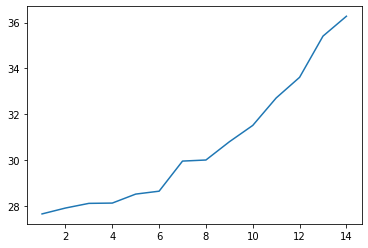

In [41]:
plt.plot(x, y_1)
y_1

In [ ]:
y_1 = np.array(y_1) + 273

<ipython-input-52-645611f45add>:8: RuntimeWarning: overflow encountered in exp
  [a, k, b, k_1], res1 = curve_fit(lambda x_1, a, k, b, k_1: b + a*np.exp(k*(x_1-k_1)),  x,  y_1)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.31915563 0.41063577 0.45499994 0.42719079 0.40473946 0.39116723
 0.39158907 0.39014811 0.43371788 0.34501336 0.34599025 0.36783002
 0.24345341 0.30486435]
[1.1853863809165257, 0.16668035981092372, 299.3912227419386, 1.1026929999630195]


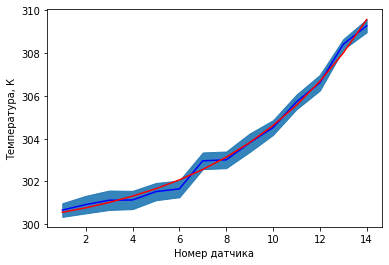

In [52]:
y2 = np.array(y_1[::-1]) +273

import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
 

[a, k, b, k_1], res1 = curve_fit(lambda x_1, a, k, b, k_1: b + a*np.exp(k*(x_1-k_1)),  x,  y_1)
stdd = 8*df[1500:1800].std().values[1:] 
print(stdd)
y1 = b + a*np.exp(k*(x-k_1))
plt.plot(x, y_1, 'b')
plt.plot(x, y1, 'r')
#plt.plot(x, 27.6 + 1.6*np.sinh(0.1*(x)), 'g')
plt.fill_between(x, (y_1-stdd), (y_1+stdd), color='tab:blue', alpha=.9)
plt.ylabel("Температура, К")
plt.xlabel("Номер датчика")
print([a, k, b, k_1])
plt.savefig('Lab2_2.eps', format='eps')
#plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.31915563 0.41063577 0.45499994 0.42719079 0.40473946 0.39116723
 0.39158907 0.39014811 0.43371788 0.34501336 0.34599025 0.36783002
 0.24345341 0.30486435]
[1910.7665308854514, 0.00034128746091541143]


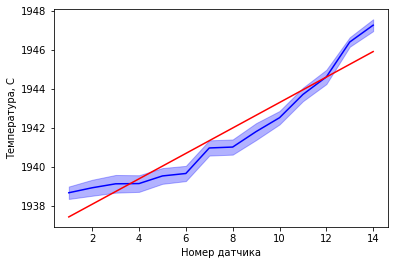

In [30]:
y2 = y_1[::-1]
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
 
t_0 = 26
[a, k], res1 = curve_fit(lambda x_1, a, k: t_0 + a*np.exp(k*x_1),  x,  y_1)
stdd = 8*df[1500:1800].std().values[1:] 
print(stdd)
y1 = t_0 + a*np.exp(k*x)
plt.plot(x, y_1, 'b')
plt.plot(x, y1, 'r')
#plt.plot(x, 27.6 + 1.6*np.sinh(0.1*(x)), 'g')
plt.fill_between(x, (y_1-stdd), (y_1+stdd), color='b', alpha=.3)
plt.ylabel("Температура, C")
plt.xlabel("Номер датчика")
print([a, k])
plt.savefig('Lab2_2.eps', format='eps')
#plt.show()

In [15]:
import lmfit
script = """
def f(x, t_0, a, k, x_0):
    return t_0 + a*np.sinh(k*(x_1-x_0) """

mod = lmfit.models.ExpressionModel('f(x, t_0, a, k, x_0)', init_script=script, independent_vars=['x'])
params = mod.make_params(x, t_0=0, a=0, k=0, x_0=0)
ans_y = mod.eval(params, x=x)

SyntaxError
   
def f(x, t_0, a, k, x_0):
    return t_0 + a*np.sinh(k*(x_1-x_0) 
Syntax Error


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [376]:
df

,time,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14
0,25.57,27.94,28.31,28.00,28.37,28.37,28.37,28.31,28.69,27.75,27.25,27.69,27.81,28.31,27.50
1,28.24,27.94,28.31,28.00,28.31,28.37,28.37,28.31,28.69,27.75,27.25,27.69,27.81,28.31,27.50
2,28.90,27.94,28.31,28.00,28.31,28.44,28.31,28.31,28.62,27.69,27.25,27.75,27.81,28.31,27.50
3,29.56,27.94,28.31,27.94,28.37,28.44,28.37,28.31,28.62,27.75,27.25,27.75,27.81,28.31,27.50
4,30.23,27.94,28.31,27.94,28.37,28.44,28.37,28.31,28.62,27.75,27.25,27.69,27.87,28.31,27.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1798.48,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.31,28.62,27.75
2670,1799.20,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.25,28.62,27.75
2671,1799.86,36.13,35.31,33.56,32.75,31.62,30.94,30.19,30.12,29.00,28.12,28.31,28.25,28.69,27.81
2672,1800.42,36.13,35.31,33.56,32.69,31.62,30.94,30.19,30.19,29.00,28.06,28.31,28.31,28.62,27.81
